In [41]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [42]:
transactions = pd.read_csv("transactions.csv")
transactions.sort_values(by="purchase_date", ascending=False)

,customer_id,product_id,purchase_date,quantity
1071537,25974,17983,2021-01-31,1
1066648,42600,26707,2021-01-31,2
1066650,44584,5221,2021-01-31,1
1066651,9942,31384,2021-01-31,2
1066652,9942,8056,2021-01-31,1
...,...,...,...,...
3397,29055,15709,2020-06-01,3
3398,14663,7428,2020-06-01,1
3399,21825,8019,2020-06-01,1
3400,21825,20336,2020-06-01,2


In [43]:
# Convert the string date to datetime format.
transactions["purchase_date"] = transactions["purchase_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())
transactions

,customer_id,product_id,purchase_date,quantity
0,38769,3477,2020-06-01,1
1,42535,30474,2020-06-01,1
2,42535,15833,2020-06-01,1
3,42535,20131,2020-06-01,1
4,42535,4325,2020-06-01,1
...,...,...,...,...
1071533,22114,29567,2021-01-31,2
1071534,22114,21068,2021-01-31,1
1071535,10900,18270,2021-01-31,1
1071536,17894,31265,2021-01-31,5


In [44]:
# Show every customer's purchase data for every unique product.
# If customer purchased same product at different times then these dates are concatenated.
transactions.groupby(by=["customer_id","product_id"])["purchase_date"].unique().to_frame()

purchase_date
customer_id product_id                          
0           1505                    [2020-09-01]
            6446        [2020-12-11, 2021-01-15]
            9325                    [2020-11-20]
            12468                   [2020-08-03]
            12505                   [2020-08-18]
...                                          ...
46137       22403                   [2021-01-18]
            22583                   [2021-01-31]
            28343                   [2020-08-08]
            28900                   [2020-08-08]
            32292                   [2020-08-08]

[896426 rows x 1 columns]

In [45]:
products = pd.read_csv("product_catalog.csv")
products.sort_values(by="product_id",inplace=True)
products.reset_index(drop=True,inplace=True)
products

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,0,389,4,2,469,0,-1,NaN
1,1,1006,4,0,487,3,66,"[2459, 274, 4124]"
2,2,464,4,1,484,0,66,NaN
3,3,389,8,1,529,0,39,"[807, 3403]"
4,4,1291,4,0,457,0,-1,"[281, 1114, 3800]"
...,...,...,...,...,...,...,...,...
32771,32771,995,10,0,515,3,188,NaN
32772,32772,333,6,1,503,0,17,"[2005, 1000, 3941]"
32773,32773,284,4,1,531,0,148,"[1705, 385, 2256, 2722, 248, 346, 3042]"
32774,32774,433,4,0,455,0,-1,[3254]


In [46]:
# Find the products with attribute_1 is -1.
products[products['attribute_1']==-1]

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
22421,22421,1445,-1,0,-1,-1,66,[1807]
26840,26840,620,-1,3,-1,-1,17,"[277, 1164, 1628, 3916]"
27536,27536,1445,-1,0,-1,-1,-1,"[2951, 2209, 3283]"
32107,32107,1445,-1,0,-1,-1,-1,"[2951, 2209, 3283]"


In [47]:
# Attributes that have the value -1 is filled up according to attribute_2's mode value.
# For instance, since attribute_1 most often takes the value 4 when attribute_2 is 0, the value -1 of attribute_1 is replaced with 4
# and when attribute_2 is 2, attribute_5 is most often takes 66.
# So, where the attribute_2 is 2 and attribute_5 is -1, the attribute_5's -1 value is replaced with 66.
#We choose attribute_2 because it doesn't contain any -1, so it is the most correct data we currently have.

attribute_columns = ['attribute_1', 'attribute_3', 'attribute_4', 'attribute_5']
modes = products.groupby(by="attribute_2")[attribute_columns].apply(lambda x: x[x != -1].mode().iloc[0])
for col in attribute_columns:
    products[col] = products.apply(lambda row: int(modes.loc[row['attribute_2']][col]) if row[col] == -1 else int(row[col]),axis=1)

products

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,0,389,4,2,469,0,66,NaN
1,1,1006,4,0,487,3,66,"[2459, 274, 4124]"
2,2,464,4,1,484,0,66,NaN
3,3,389,8,1,529,0,39,"[807, 3403]"
4,4,1291,4,0,457,0,17,"[281, 1114, 3800]"
...,...,...,...,...,...,...,...,...
32771,32771,995,10,0,515,3,188,NaN
32772,32772,333,6,1,503,0,17,"[2005, 1000, 3941]"
32773,32773,284,4,1,531,0,148,"[1705, 385, 2256, 2722, 248, 346, 3042]"
32774,32774,433,4,0,455,0,17,[3254]


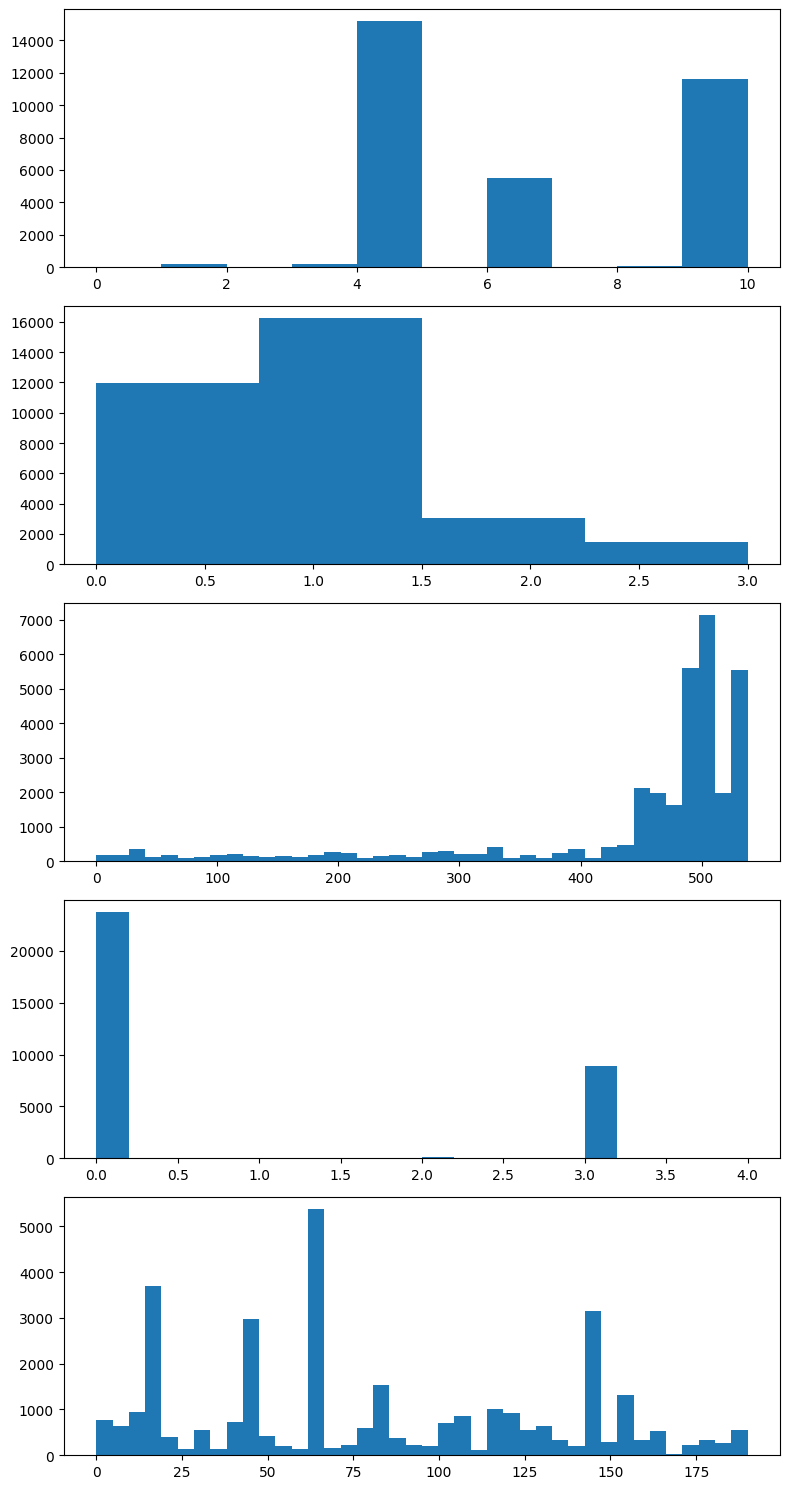

In [48]:
# New attribute values are plotted with histogram.

fig, ax = plt.subplots(5, 1, figsize=(8, 15))
ax[0].hist(products["attribute_1"], bins=10)
ax[1].hist(products["attribute_2"], bins=4)
ax[2].hist(products["attribute_3"], bins=40)
ax[3].hist(products["attribute_4"], bins=20)
ax[4].hist(products["attribute_5"], bins=40)
fig.tight_layout()

In [49]:
product_categories = pd.read_csv("product_category_map.csv")
product_categories
#product_categories[product_categories["category_id"].duplicated(keep=False)]

,category_id,parent_category_id
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623
...,...,...
4327,4295,3898
4328,4296,3898
4329,4297,3898
4330,4298,3898


In [50]:
#If category data is hierarchical and contains no cycles, than every chain of categories should end with a category whose parent is itself
product_categories[product_categories["category_id"] == product_categories["parent_category_id"]]
#We see the only category whose parent is itself is 3898. So, every category should lead to 3898 if we follow the parents.

,category_id,parent_category_id
3930,3898,3898


In [51]:
#We checked each parent chain to detect if there are any cycles.
# We discovered that 3898 actually is the main parent_category_id of all category_ids. All parent_category_ids are end up with 3898.
hierarchy_chains = []
for cat in product_categories["category_id"]:
    lst = []
    while True:
        lst.append(cat)
        cat = product_categories.loc[product_categories["category_id"]== cat,"parent_category_id"].values[0]
        if cat in lst:
            hierarchy_chains.append(lst)
            break
hierarchy_chains

[[0, 75, 2364, 3898],
 [1, 1499, 3761, 2723, 3898],
 [2, 1082, 2231, 3898],
 [3, 3498, 2364, 3898],
 [4, 1623, 1825, 3898],
 [5, 2478, 2364, 3898],
 [6, 1582, 2364, 3898],
 [7, 3027, 1840, 3898],
 [8, 2364, 3898],
 [9, 3590, 3178, 2346, 3898],
 [10, 582, 34, 3898],
 [11, 3686, 1049, 2346, 3898],
 [12, 3241, 600, 3898],
 [13, 510, 2231, 3898],
 [14, 2160, 678, 3898],
 [15, 1765, 432, 3898],
 [16, 3786, 2284, 2392, 1072, 3898],
 [17, 844, 1111, 772, 252, 3898],
 [18, 1640, 2364, 3898],
 [19, 3772, 484, 875, 3898],
 [20, 2741, 2497, 2793, 3898],
 [21, 802, 678, 3898],
 [22, 2246, 3174, 432, 3898],
 [23, 3830, 982, 275, 3898],
 [24, 3550, 1072, 3898],
 [25, 1125, 2401, 1272, 181, 2087, 3624, 3898],
 [26, 1790, 3898],
 [27, 1987, 3178, 2346, 3898],
 [28, 2516, 2723, 3898],
 [29, 3488, 2364, 3898],
 [30, 1682, 3898],
 [31, 3643, 2086, 2793, 3898],
 [32, 138, 3572, 3616, 3898],
 [33, 2364, 3898],
 [34, 3898],
 [35, 3159, 3541, 3504, 3898],
 [36, 678, 3898],
 [37, 2114, 2266, 1559, 3898],
 [38

In [52]:
#We looked for a couple of things below to have insight about categories. Before that, we cleaned the "categories" column in product dataset to work with.

import ast
# NaN values are dropped in categories column and category string lists are converted to lists.
new_products = products.dropna(subset=["categories"])
new_products["categories"] = new_products["categories"].apply(ast.literal_eval)
new_products = new_products.reset_index(drop=True)
new_products

C:\Users\Oğuzhan ÇELİK\AppData\Local\Temp\ipykernel_15936\3634139899.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_products["categories"] = new_products["categories"].apply(ast.literal_eval)


,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,1,1006,4,0,487,3,66,"[2459, 274, 4124]"
1,3,389,8,1,529,0,39,"[807, 3403]"
2,4,1291,4,0,457,0,17,"[281, 1114, 3800]"
3,6,1496,10,0,51,0,127,"[2969, 327, 2897, 3413, 4027, 3920, 4028]"
4,8,1048,4,0,28,0,175,"[813, 3949]"
...,...,...,...,...,...,...,...,...
25983,32770,142,10,2,503,3,17,"[2995, 4012, 4108]"
25984,32772,333,6,1,503,0,17,"[2005, 1000, 3941]"
25985,32773,284,4,1,531,0,148,"[1705, 385, 2256, 2722, 248, 346, 3042]"
25986,32774,433,4,0,455,0,17,[3254]


In [53]:
#Check if 3898 is in the category lists of products.
#We suspect that 3898 is the ultimate "everything category", so we would expect products to not have 3898 in their category list directly.
for index,product in new_products.iterrows():
    if 3898 in product["categories"]:
        print(product["categories"])

In [54]:
#Count which categories contain the most products to see if there are any patterns.
dct = {}
for index,product in new_products.iterrows():
    for cat in product["categories"]:
        if cat not in dct.keys():
            dct[cat] = 1
        else:
            dct[cat]+=1

df = pd.DataFrame([dct]).T
df.sort_values(by=0,ascending=False, inplace=True)
df.head(20)

,0
3903,1596
3900,1547
3901,1467
3902,1179
3910,1081
1807,857
3916,773
3915,644
2136,601
3625,591


In [55]:
# Shows that some category_ids have two different parent_category_id.
product_categories[product_categories["category_id"].duplicated(keep=False)]

,category_id,parent_category_id
207,207,2917
208,207,3685
264,263,772
265,263,1666
331,329,2917
...,...,...
3662,3632,1666
3839,3809,3829
3840,3809,3001
3922,3891,1062


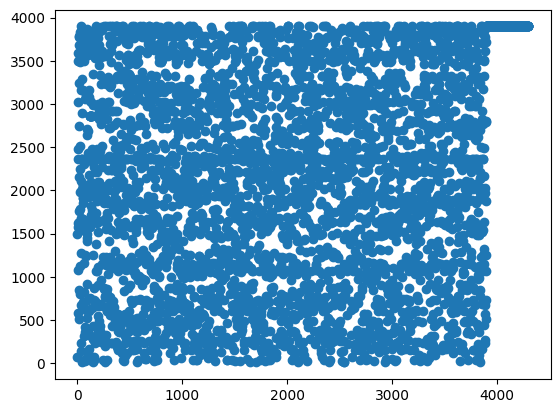

In [56]:
# category_id and parent_category_id pair is plotted to see if there is any anomaly.
plt.scatter(x=product_categories["category_id"], y=product_categories["parent_category_id"])
#Every cateogry after a certain point leads to 3898 directly.

In [57]:
# The number parent_category_id's whose parent_category_id is directly 3898. So, this shows the number of first layer parent_category_id after 3898.
product_categories[product_categories["parent_category_id"] == 3898].nunique()

category_id           486
parent_category_id      1
dtype: int64

In [58]:
# There are 697 different different parent_category_id at total. This shows the number of first layer before the leaf node categories
product_categories["parent_category_id"].nunique()

697

In [59]:
test_set = pd.read_csv("test.csv")
test_set["prediction"] = pd.NA
test_set = test_set.set_index("id")
test_set

,customer_id,product_id,prediction
id,,,
0,0,20664,NaN
1,0,28231,NaN
2,13,2690,NaN
3,15,1299,NaN
4,15,20968,NaN
...,...,...,...
9995,46118,20106,NaN
9996,46124,19677,NaN
9997,46125,12878,NaN
